# Trabajo Práctico Semanal 3
Teoria de circuitos II

### Sandomir L Uriel

#### Se requiere diseñar un filtro activo siguendo las condiciones impuestas en la siguiente plantilla de diseño:

<img src="https://lh4.googleusercontent.com/XOqqhroVf96ibPqJTyJ37P_Wq94IkOyrOWdY_7CjfPthd5mH9_xfScQhuh4iG6xTIsV5pDZ3F7wKN2L7Y5VB9K2AsTYTBJlaCacWm4FcwQ3OZtXSvuDWd6XGvBqhOG3LGcWM9V3JxnpHis7ddA"/>

Con:
$\alpha_{min} = 35 dB, \alpha_{max} = 1 dB, f_s = 1000Hz, f_p = 3500Hz$

<br>
Podemos identificar mirando la plantilla que se trata de un Filtro Pasa-Altos. Este mismo se puede normalizar y transformar en un Filtro Pasa-Bajos reemplazando la variable independiente $\omega$ por $\Omega = \frac{1}{\omega}$ del eje de abscisas:
<br>
<img src="https://i.gyazo.com/5f839288563811e8780bd9545b6230fa.png"/>
<br>
Planteamos a $\alpha_{max}$ segun la funcion de transferencia de un filtro de Maxima Planicidad y ya que tenemos nuestra frecuencia de paso normalizada, podemos despejar $\xi^2$ y obtener su valor:
<br>
<img src="https://i.gyazo.com/aa24080ed000de7fea2c544a6c9882fe.png"/>
<br>
Ahora planteando la misma ecuacion pero para $\alpha_{min}$, podemos iterar con distintos valores de N hasta lograr la atenuacion solicitada:
<br>
<img src="https://i.gyazo.com/418c0492b014bee355d186b348a08886.png"/>
<br>
Renormalizamos para poder trabajar nuestra función transferencia de Maxima Planicidad como Butterworth con la norma: $\omega_B = \frac{\omega}{\omega_s} \xi^{1/n}$
<br>
Obteniendo:
$|T_L(\omega)|^2 = \frac{1}{1+\omega_B^{2n}}$
<br>
Ahora, podemos separar nuestra función de orden 4 en otras 2 funciones de orden 2 del tipo Butterworth:
<br>
$T_{L}(s) = T_{B2_a} . T_{B2_b}$
<br><br>
Para lograr la funcion de orden 4, ubicamos 2 pares de polos compuestos conjugados sobre la circunferencia unitaria en el semiplano izquierdo, quedandonos con 2 polos a $\frac{\pi}{8}$ del eje $\sigma$ y otros 2 polos a $\frac{3\pi}{8}$
Por lo que nuestras funciones de transferencia Butterworth nos quedaran:
$T_{L}(s) = \frac{1}{s^2 + s . 2 cos\phi_1 + 1} . \frac{1}{s^2 + s . 2 cos\phi_1 + 1} = \frac{1}{s^2 + s . 2 cos(\frac{\pi}{8}) + 1} . \frac{1}{s^2 + s . 2 cos(\frac{3\pi}{8}) + 1}$
<br>
$T_{L}(s) = \frac{1}{s^2 + s . 1,8478 + 1} . \frac{1}{s^2 + s . 0,7654 + 1} = \frac{1}{s^4 + s^3.2,6132 + s^2.3,4143 + s.2,6132 + 1}$
<br>


<br>Desnormalizando las funciones para salir del radio unitario con $\$=S.\xi^{\frac{1}{N}}$: 
<br><br>
<img src="https://i.gyazo.com/c3adcc37530cb3fad8f2fe122b7d20fb.png"/>

<br>Transformando nuevamente en un Filtro Pasa-Altos:
<br>
<img src="https://i.gyazo.com/56fd4b22962d5086b8146039f733e03b.png"/>
<br>
Y parametrizando como una funcion de Pasa-Altos generica:
<img src="https://i.gyazo.com/33a055a520468ff8315dd2673350a7b8.png"/>
<br>
Donde se identifica:
<br>$\omega_o = 0.8446$
<br>$Q1 = 0.5412$
<br>$Q2 = 1.307$
<br><br>
Obtenemos entonces 4 ceros en el origen y raices en:

In [7]:
import numpy as np
raicesA = np.roots([1,1.5605,0.7133])
raicesB = np.roots([1,0.6464,0.7133])
raicesA, raicesB

(array([-0.78025+0.32327997j, -0.78025-0.32327997j]),
 array([-0.32299428+0.78018904j, -0.32299428-0.78018904j,
        -0.78050572+0.32310223j, -0.78050572-0.32310223j]))

$S_{a1}= -0.78025 + i 0.32328$ <br> $S_{a2}= -0.78025 - i 0.32328$ <br> $S_{b1}= -0.3232 + i 0.78028$ <br> $S_{b2}= -0.3232 - i 0.78028$
<br><br>
##### Respuesta en frecuencia y diagrama de polos y ceros:

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

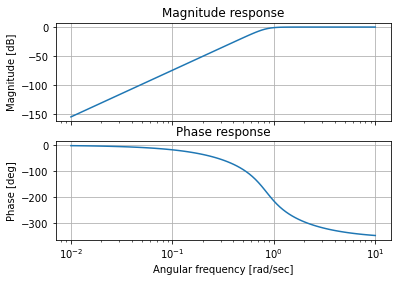

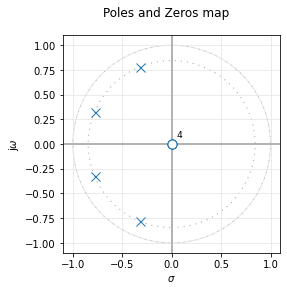

In [8]:
import scipy.signal as signal
import splane

num = [1,0,0,0,0]
den = ([1, 2.207, 2.435, 1.574,.5088])
filtro = signal.TransferFunction(num, den)
splane.bodePlot(filtro)
splane.pzmap(filtro)

###### Circuito pasivo 

Si queremos implementar un circuito con estructuras pasivas para lograr el mismo comportamiento que con nuestra funcion Pasa-Altos, podemos hacerlo de esta manera:

<img src="https://i.gyazo.com/478c6ff1284ca330686fef6f50415244.png" />

Donde para esa estructura RLC, obtenemos ecuaciones de la forma:
<br>$\omega_0^2 = 1  =>  L = \frac{1}{C}$
<br>$\frac{\omega_0}{Q} = \frac{R}{L}$, Si $L = 1 => C = 1, R = \frac{1}{Q}$ 
<br><br><br>
Para nuestro caso tenemos:
<br>$Q_1 = 0.5412$ <br> $Q_2 = 1.307$
<br>$R_1 = \frac{1}{Q1}$
<br>$R_2 = \frac{1}{Q2}$ 
<br>$L_1 = L_2 = 1$   
<br>$C_1 = C_2 = 1$

##### Desnormalizacion de los componentes

Tenemos como condicion, utilizar una norma de impedancia $\Omega_z = 1K$, mientras que por el procedimiento utilizado, normalizamos con la frecuencia de paso afectada por la frecuencia de corte de nuestra funcion: $ \Omega_{\omega} = \frac{1}{\omega_p} . \frac{1}{0.8446}$
<br>


### Desnormalizando los componentes obtenemos:
<br>
$R_1 = \frac{1}{0.5412} . 1K\Omega = 1.8477K\Omega$ 
<br><br>
$R_2 = \frac{1}{1.307} . 1K\Omega = 0.7651K\Omega$ 
<br><br>
$L_1 = 1 . \Omega_Z . \Omega_{\omega} = 1 . 1000 . \frac{1}{7000\pi} . \frac{1}{0.8446} Hy = 53.84 mHy$
<br><br>
$C_1 = 1 . \frac{1}{\Omega_Z} . \Omega_{\omega}  = 1 . \frac{1}{1000} . \frac{1}{7000\pi} . \frac{1}{0.8446} = 53.84 nF $
<br><br>
$L_2 = 1 . \Omega_Z . \Omega_{\omega} = 1 . 1000 . \frac{1}{7000\pi} . \frac{1}{0.8446} Hy = 53.84 mHy $
<br><br>
$ C_2 = 1 . \frac{1}{\Omega_Z} . \Omega_{\omega} = 1 . \frac{1}{1000} . \frac{1}{7000\pi} . \frac{1}{0.8446} = 53.84nF $
<br><br>
Tenemos entonces un circuito como el siguiente:
<br><img src="https://i.gyazo.com/7f9761f4d4acc75b41be86d92072bfdf.png"/>
<br><img src="https://i.gyazo.com/183b8ad1bab6715a15a7cc95a35887de.png"/>

Ahora buscamos activar las bobinas, podemos hacerlo de la siguiente manera mediante un GIC de Antoniou:

<img src="https://i.gyazo.com/90a7f5b18fac5d04fa2ff8139b023578.png"/>
<br>
Como vamos a aprovechar las salidas activas del GIC, debemos colocar una etapa atenuadora para compensar las ganancias de la señal de entrada en dichas salidas. Esta es de 2 veces por cada GIC, por lo tanto, debemos atenuar 4 veces la señal de salida del segundo GIC.
<br>
<br>

##### Simulacion circuital: 

<img src="https://i.gyazo.com/1e21322ed402098753c06c3de46d8c85.png"/>
<br>
Donde podemos observar que para $f_s = 1000Hz$ tenemos una atenuacion de 37.45dB, y en $f_p = 3500Hz$ una atenuacion menos a 1dB, por lo que podemos considerar a la consigna cumplida.